In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as mpatches
import warnings

!pip install wordcloud
from wordcloud import WordCloud

!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

mpl.font_manager.fontManager.addfont("thsarabunnew-webfont.ttf")
mpl.rc('font',family="TH Sarabun New")

warnings.filterwarnings("ignore", category=DeprecationWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
url =
file_id = url.split('/')[-2]
dwn_url = 

df = pd.read_csv(dwn_url)
data = pd.DataFrame(df)

**ส่วนข้อมูลส่วนตัว**

In [ ]:
#เพศ
print(data['เพศ'].value_counts())

หญิง       52
ชาย        33
LGBTQ       9
ไม่ระบุ     3
Name: เพศ, dtype: int64


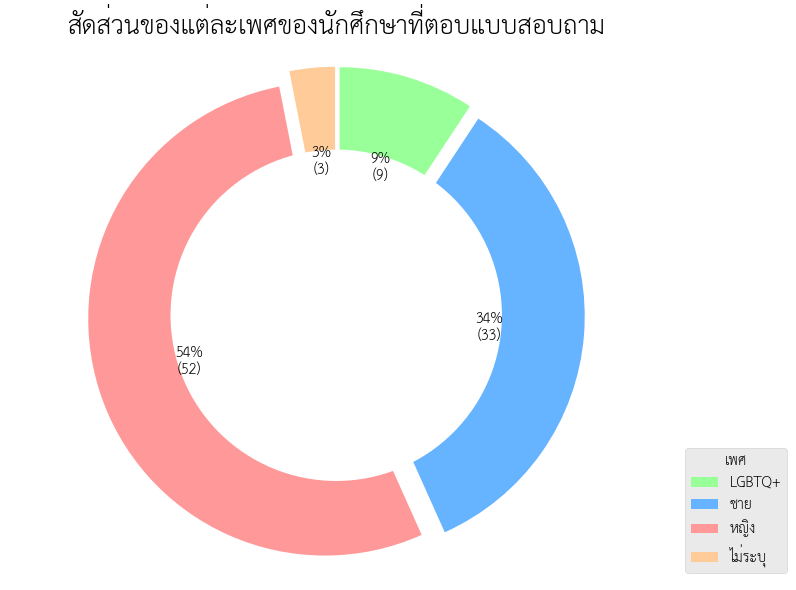

In [ ]:
grouped_gender = data.groupby('เพศ').size()

# set up the chart
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(figsize=(8, 6))

# define colors and explode values for each gender
colors = ['#99ff99','#66b3ff','#ff9999','#ffcc99']
explode = (0.05, 0.05, 0.05, 0.05)

# calculate the percentage and count for each gender group
percentages = grouped_gender/grouped_gender.sum() * 100
counts = grouped_gender.values

# create the pie chart with data labels
ax.pie(grouped_gender, colors=colors, explode=explode, autopct=lambda pct: f'{pct:.0f}%\n({pct/100*sum(counts):.0f})',
       startangle=90, counterclock=False)
ax.set_title('สัดส่วนของแต่ละเพศของนักศึกษาที่ตอบแบบสอบถาม', fontsize=18, fontweight='bold')

# add a legend with custom labels
labels = ['LGBTQ+', 'ชาย', 'หญิง', 'ไม่ระบุ']
ax.legend(labels, title='เพศ', loc='lower right', bbox_to_anchor=(1.2, 0))

# add a donut hole in the center of the chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# show the chart
plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
#ชั้นปี
print(data['ชั้นปี'].value_counts())

2 (รหัส 64)    52
1 (รหัส 65)    20
3 (รหัส 63)    18
4 (รหัส 62)     6
5 (รหัส 61)     1
Name: ชั้นปี, dtype: int64


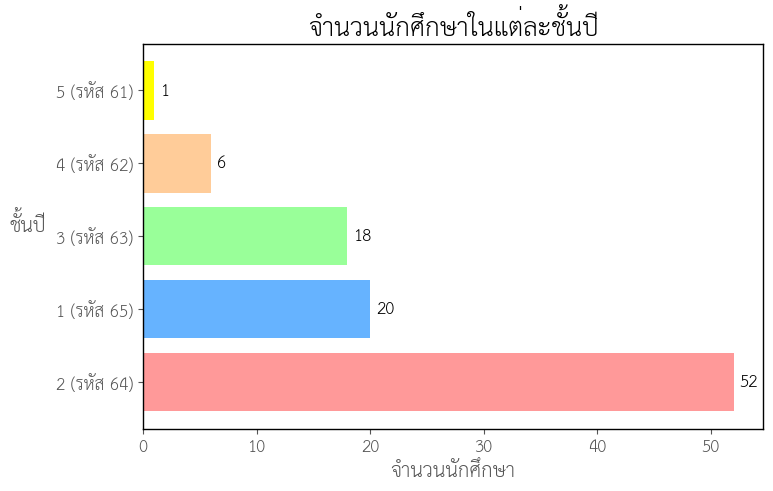

In [ ]:
counts = data['ชั้นปี'].value_counts()

# set Thai font
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rcParams['font.family'] = 'TH Sarabun New'

# create the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(counts.index, counts.values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', 'yellow'])

# add count labels on top of the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_width() + 0.5, i, str(counts.values[i]), ha='left', va='center', fontsize=12)

# customize the chart
ax.set_title('จำนวนนักศึกษาในแต่ละชั้นปี', fontsize=18)
ax.set_xlabel('จำนวนนักศึกษา', fontsize=14)
ax.set_ylabel('ชั้นปี', fontsize=14, rotation=0, labelpad=20)
ax.tick_params(labelsize=12)

# Set the style of the axes
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Set the color and width of the top spine
ax.spines['top'].set_linewidth(1)
ax.spines['top'].set_edgecolor('black')
ax.spines['right'].set_linewidth(1)
ax.spines['right'].set_edgecolor('black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_edgecolor('black')
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_edgecolor('black')

# Set the facecolor of the axes
ax.set_facecolor('white')

# show the chart
plt.show()




In [ ]:
#คณะ
print(data['คณะ'].value_counts())

คณะวิทยาศาสตร์และเทคโนโลยี            51
คณะนิติศาสตร์                         11
คณะวิศวกรรมศาสตร์                      5
คณะวารสารศาสตร์และสื่อสารมวลชน         4
คณะสหเวชศาสตร์                         4
คณะศิลปศาสตร์                          4
คณะแพทยศาสตร์                          3
คณะรัฐศาสตร์                           3
คณะศิลปกรรมศาสตร์                      2
คณะพาณิชยศาสตร์และการบัญชี             2
สถาบันเทคโนโลยีนานาชาติสิรินธร         2
คณะพยาบาลศาสตร์                        1
วิทยาลัยแพทยศาสตร์นานาชาติจุฬาภรณ์     1
วิทยาลัยพัฒนศาสตร์ ป๋วย อึ๊งภากรณ์     1
คณะสังคมสงเคราะห์ศาสตร์                1
คณะวิทยาการเรียนรู้และศึกษาศาสตร์      1
คณะเศรษฐศาสตร์                         1
Name: คณะ, dtype: int64


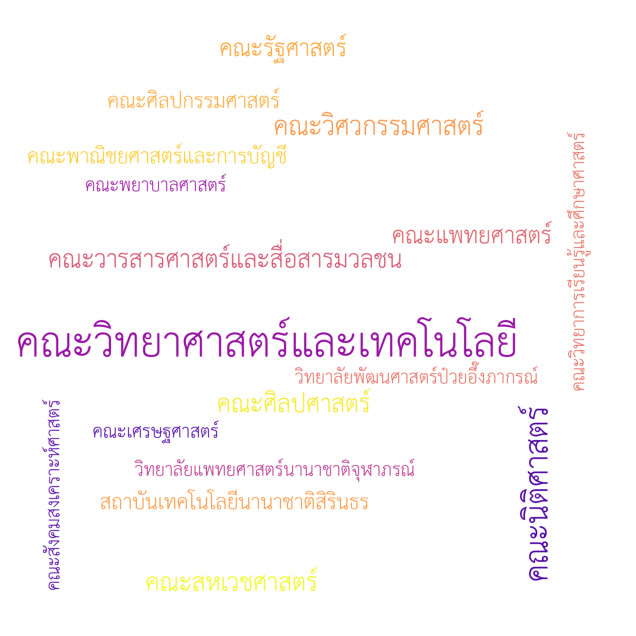

In [ ]:
data['คณะ'] = data['คณะ'].replace('วิทยาลัยพัฒนศาสตร์ ป๋วย อึ๊งภากรณ์', 'วิทยาลัยพัฒนศาสตร์ป๋วยอึ๊งภากรณ์')

# Join all the 'คณะ' values into a single string
text = ' '.join(data['คณะ'].astype(str))

regexp = r"[ก-๙a-zA-Z']+"
path = '/content/thsarabunnew-webfont.ttf'
# Generate a wordcloud image
#wordcloud = WordCloud(font_path=path,width=800, height=800, background_color='white' ,regexp=regexp,).generate(text)
wordcloud = WordCloud(
                      font_path=path,
                      relative_scaling = 0.3,
                      min_font_size=1,
                      background_color="white",
                      width=500,
                      height=500,
                      max_words=2000,
                      colormap='plasma',
                      scale=3,
                      font_step=3,
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text)

# Display the wordcloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**ส่วนคำถาม**

In [ ]:
#คุณมีรถเป็นของตัวเองหรือไม่
print(data['คุณมีรถเป็นของตัวเองหรือไม่'].value_counts())

ไม่มี    65
มี       32
Name: คุณมีรถเป็นของตัวเองหรือไม่, dtype: int64


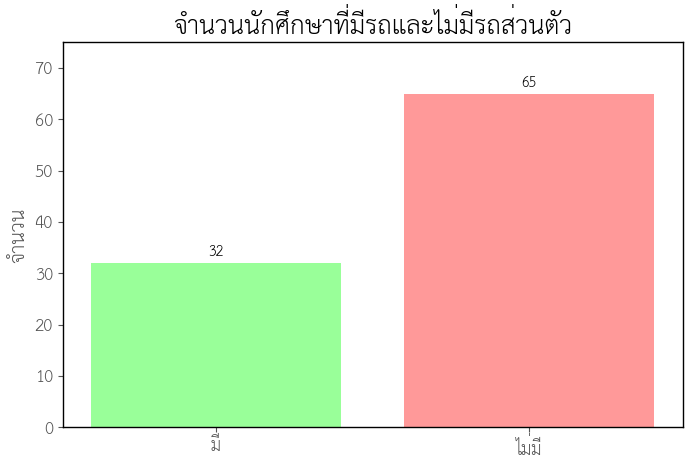

In [ ]:
# Set the seaborn-pastel style
plt.style.use('seaborn-pastel')

# Count the values in the 'คุณมีรถเป็นของตัวเองหรือไม่' column
counts = data['คุณมีรถเป็นของตัวเองหรือไม่'].value_counts()

# Define custom colors (swapped order)
colors = ['#99ff99','#ff9999']

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(8, 5))

# Create a bar plot with swapped data positions
ax.bar(counts.index[::-1], counts.values[::-1], color=colors)

# Add count labels on top of the bars
for i, count in enumerate(counts.values[::-1]):
    ax.text(i, count+0.5, str(count), ha='center', va='bottom', fontweight='bold')

# Customize the plot
ax.set_title('จำนวนนักศึกษาที่มีรถและไม่มีรถส่วนตัว', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('จำนวน', fontsize=14)
ax.tick_params(labelsize=12)

# Remove the grid
ax.grid(False)

# Set the facecolor of the axes
ax.set_facecolor('white')

# Set the style of the axes
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Set the color and width of the top spine
ax.spines['top'].set_linewidth(1)
ax.spines['top'].set_edgecolor('black')
ax.spines['right'].set_linewidth(1)
ax.spines['right'].set_edgecolor('black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_edgecolor('black')
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_edgecolor('black')
plt.ylim(0, counts.max() + 10)

# Show the plot
plt.show()


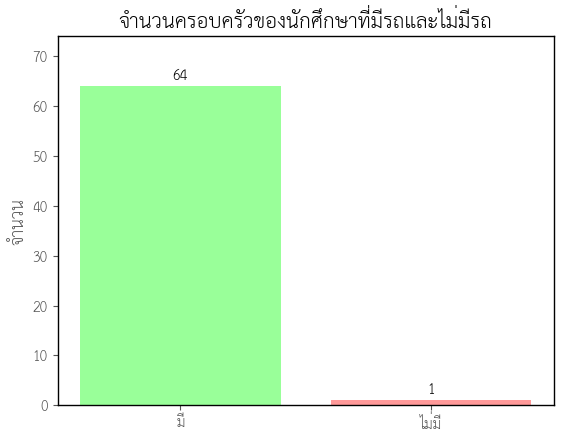

In [ ]:
# Set the seaborn-pastel style
plt.style.use('seaborn-pastel')

# Count the values in the 'ครอบครัวของคุณมีรถหรือไม่ ?' column
counts = data['ครอบครัวของคุณมีรถหรือไม่ ?'].value_counts()

# Define custom colors
colors = ['#99ff99','#ff9999']

# Create a bar plot
plt.bar(counts.index, counts.values, color=colors)

# Set the plot title and axis labels
plt.title('จำนวนครอบครัวของนักศึกษาที่มีรถและไม่มีรถ')
plt.xlabel('')
plt.ylabel('จำนวน')

# Add count labels on top of the bars
for i, count in enumerate(counts.values):
    plt.text(i, count+0.5, str(count), ha='center', va='bottom', fontweight='bold')

# Remove the grid
plt.grid(False)

# Set the facecolor of the axes
plt.gca().set_facecolor('white')

# Set the style of the axes
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['top'].set_edgecolor('black')
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['right'].set_edgecolor('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['bottom'].set_edgecolor('black')
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['left'].set_edgecolor('black')
plt.ylim(0, counts.max() + 10)
# Show the plot
plt.show()

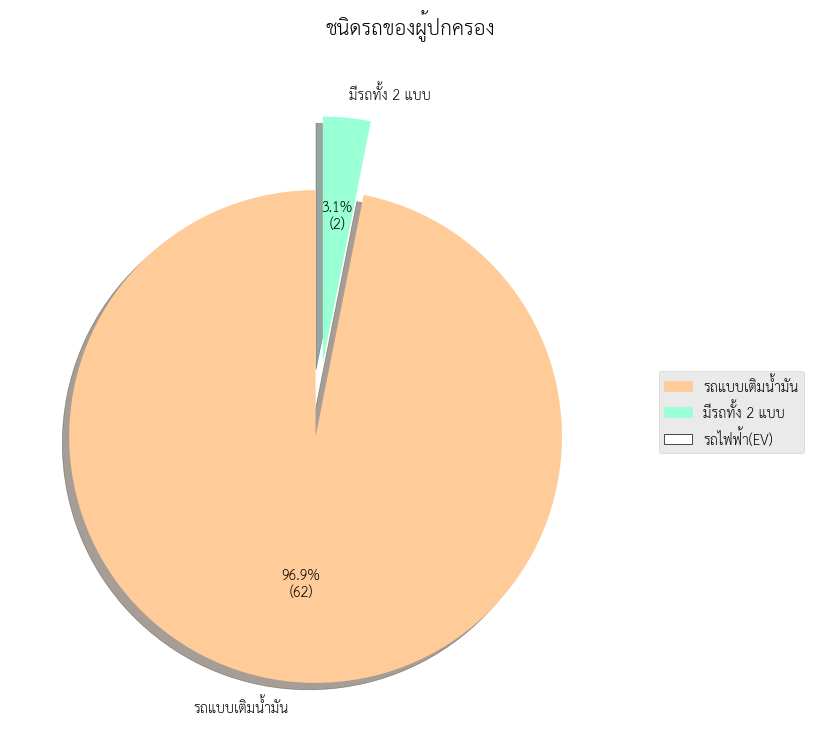

In [ ]:
plt.figure(figsize=(8,8))
#ประเภทรถที่ครอบครัวของคุณมี
values = data['ประเภทรถที่ครอบครัวของคุณมี'].value_counts().values
# Create a dictionary of label-value pairs
legend_dict = {'รถแบบเติมน้ำมัน': values[0], 'มีรถทั้ง 2 แบบ': values[1], 'รถไฟฟ้า(EV)': 0}

# Create a list of labels for the pie chart
labels = ['รถแบบเติมน้ำมัน', 'มีรถทั้ง 2 แบบ']

# Get the values from the dictionary
values = [legend_dict[label] for label in labels]

# Set the color cycle to a green tone
colors = ['#FFCC99', '#99FFD5']

# Set the explode values (separate each slice of the pie chart)
explode = [0.1, 0.2]

# Add 'รถไฟฟ้า(EV)' to the legend, but not to the pie chart
labels.append('รถไฟฟ้า(EV)')

autopct_string = lambda pct, count: f'{pct:.1f}%\n({count})'

# Create the pie chart
plt.pie(values, labels=labels[:-1], colors=colors, explode=explode, autopct=lambda pct: autopct_string(pct, int(round(pct/100*sum(values)))), startangle=90, shadow=True)


# Add a title
plt.title('ชนิดรถของผู้ปกครอง',loc='center',y=1.1,x=0.65)

# Create a custom legend
handles = [mpatches.Patch(color=color, label=label) for label, color in zip(labels[:-1], colors)]
handles.append(mpatches.Patch(facecolor='white', edgecolor='black', label=labels[-1]))
plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.3, 0.5))

# Show the plot
plt.show()

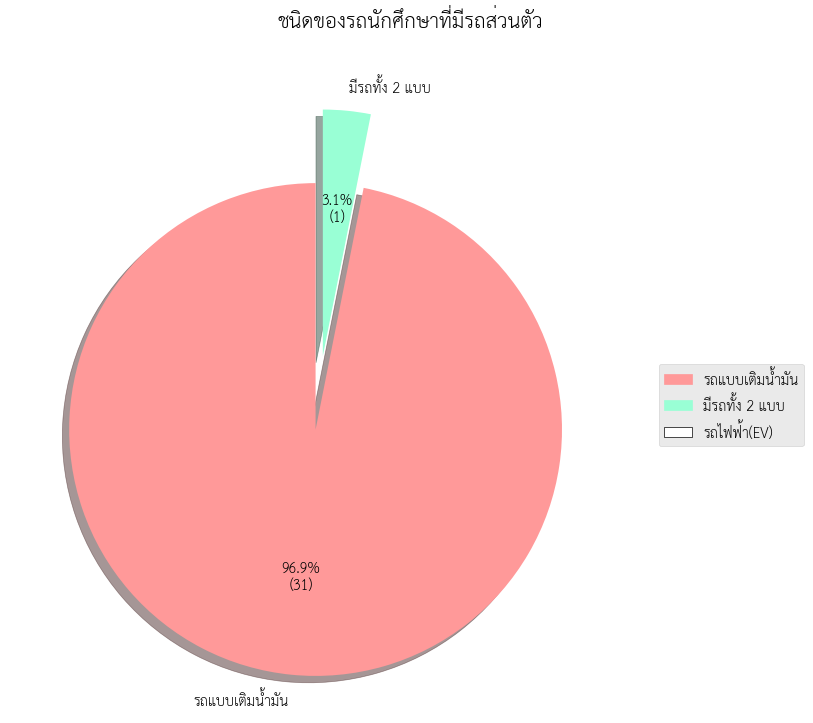

In [ ]:
plt.figure(figsize=(8,8))
values = data['ประเภทของรถที่คุณมี'].value_counts().values
# Create a dictionary of label-value pairs
legend_dict = {'รถแบบเติมน้ำมัน': values[0], 'มีรถทั้ง 2 แบบ': values[1], 'รถไฟฟ้า(EV)': 0}

# Create a list of labels for the pie chart
labels = ['รถแบบเติมน้ำมัน', 'มีรถทั้ง 2 แบบ']

# Get the values from the dictionary
values = [legend_dict[label] for label in labels]

# Set the color cycle to a green tone
colors = ['#ff9999', '#99FFD5']

# Set the explode values (separate each slice of the pie chart)
explode = [0.1, 0.2]

# Add 'รถไฟฟ้า(EV)' to the legend, but not to the pie chart
labels.append('รถไฟฟ้า(EV)')

autopct_string = lambda pct, count: f'{pct:.1f}%\n({count})'

# Create the pie chart
plt.pie(values, labels=labels[:-1], colors=colors, explode=explode, autopct=lambda pct: autopct_string(pct, int(round(pct/100*sum(values)))), startangle=90, shadow=True)


# Add a title
plt.title('ชนิดของรถนักศึกษาที่มีรถส่วนตัว',loc='center',y=1.1,x=0.65)

# Create a custom legend
handles = [mpatches.Patch(color=color, label=label) for label, color in zip(labels[:-1], colors)]
handles.append(mpatches.Patch(facecolor='white', edgecolor='black', label=labels[-1]))
plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.3, 0.5))

# Show the plot
plt.show()


In [ ]:
#จากการใช้งานรถทั้ง 2ชนิด คุณใช้รถชนิดไหนบ่อยกว่ากัน
#จากคำถามข้างต้น เหตุใดคุณถึงใช้งานบ่อยกว่า
print(data['จากการใช้งานรถทั้ง 2ชนิด คุณใช้รถชนิดไหนบ่อยกว่ากัน'].value_counts())
print(data['จากคำถามข้างต้น เหตุใดคุณถึงใช้งานบ่อยกว่า'].value_counts())
data['จากคำถามข้างต้น เหตุใดคุณถึงใช้งานบ่อยกว่า'] = data['จากคำถามข้างต้น เหตุใดคุณถึงใช้งานบ่อยกว่า'].replace('ประหยัดน้ำมัร', 'ประหยัดน้ำมัน')
categories = data['จากคำถามข้างต้น เหตุใดคุณถึงใช้งานบ่อยกว่า'].value_counts().index.tolist()

รถไฟฟ้า(EV)     2
รถเติมน้ำมัน    1
Name: จากการใช้งานรถทั้ง 2ชนิด คุณใช้รถชนิดไหนบ่อยกว่ากัน, dtype: int64
ประหยัดน้ำมัร                           1
รถใช้วิ่งในระยะทางใกล้ประหยัดกว่า       1
ไม่ต้องแพลนเวลาเพื่อการจอดพักชาร์จรถ    1
Name: จากคำถามข้างต้น เหตุใดคุณถึงใช้งานบ่อยกว่า, dtype: int64


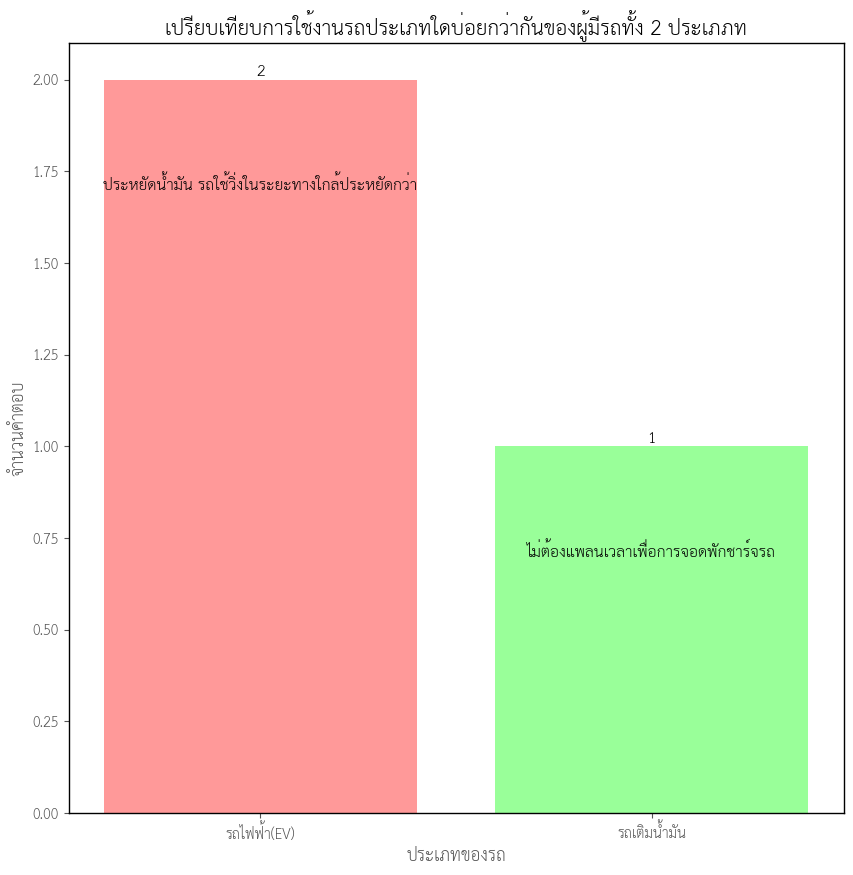

In [ ]:
value_counts = data['จากการใช้งานรถทั้ง 2ชนิด คุณใช้รถชนิดไหนบ่อยกว่ากัน'].value_counts()

plt.style.use('ggplot')
# Create a bar plot
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(value_counts.index, value_counts.values, color=['#ff9999','#99ff99'])

# Annotate the plot with the count values
for i in range(len(value_counts)):
    ax.annotate(str(value_counts.values[i]), xy=(value_counts.index[i], value_counts.values[i]),
                ha='center', va='bottom', fontsize=11)

# Annotate the plot with the reason for the selection
reasons = [categories[0] +' '+ categories[1] , categories[2]]
for i in range(len(value_counts)):
    ax.annotate(reasons[i], xy=(value_counts.index[i], value_counts.values[i]),
                xytext=(value_counts.index[i], value_counts.values[i]-0.3),
                ha='center', fontsize=11)

# Set the plot title and axis labels
ax.set_title('เปรียบเทียบการใช้งานรถประเภทใดบ่อยกว่ากันของผู้มีรถทั้ง 2 ประเภภท')
ax.set_xlabel('ประเภทของรถ')
ax.set_ylabel('จำนวนคำตอบ')
ax.grid(False)
ax.set_facecolor('white')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['top'].set_edgecolor('black')
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['right'].set_edgecolor('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['bottom'].set_edgecolor('black')
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['left'].set_edgecolor('black')

plt.show()

**รถแบบเติมนํ้ามัน**

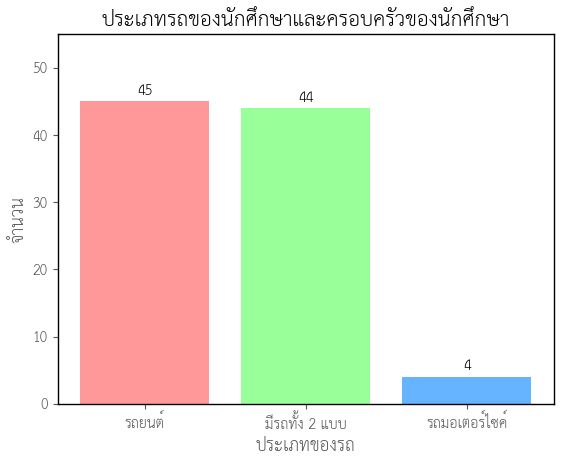

In [ ]:
plt.style.use('seaborn-pastel')

# Count the values in the 'คุณมีรถเป็นของตัวเองหรือไม่' column
counts = data['รถที่คุณมีคือรถประเภทใด'].value_counts()

# Define custom colors
colors = ['#ff9999','#99ff99','#66B3FF']

# Create a bar plot
plt.bar(counts.index, counts.values, color=colors)

# Add count labels to the plot
for i, count in enumerate(counts.values):
    plt.text(i, count+1, str(count), ha='center', fontsize=10)

# Set the plot title and axis labels
plt.title('ประเภทรถของนักศึกษาและครอบครัวของนักศึกษา')
plt.xlabel('ประเภทของรถ')
plt.ylabel('จำนวน')
plt.gca().set_facecolor('white')
ax.grid(False)
ax.set_facecolor('white')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['top'].set_edgecolor('black')
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['right'].set_edgecolor('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['bottom'].set_edgecolor('black')
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['left'].set_edgecolor('black')
plt.ylim(0, counts.max() + 10)
# Show the plot
plt.show()

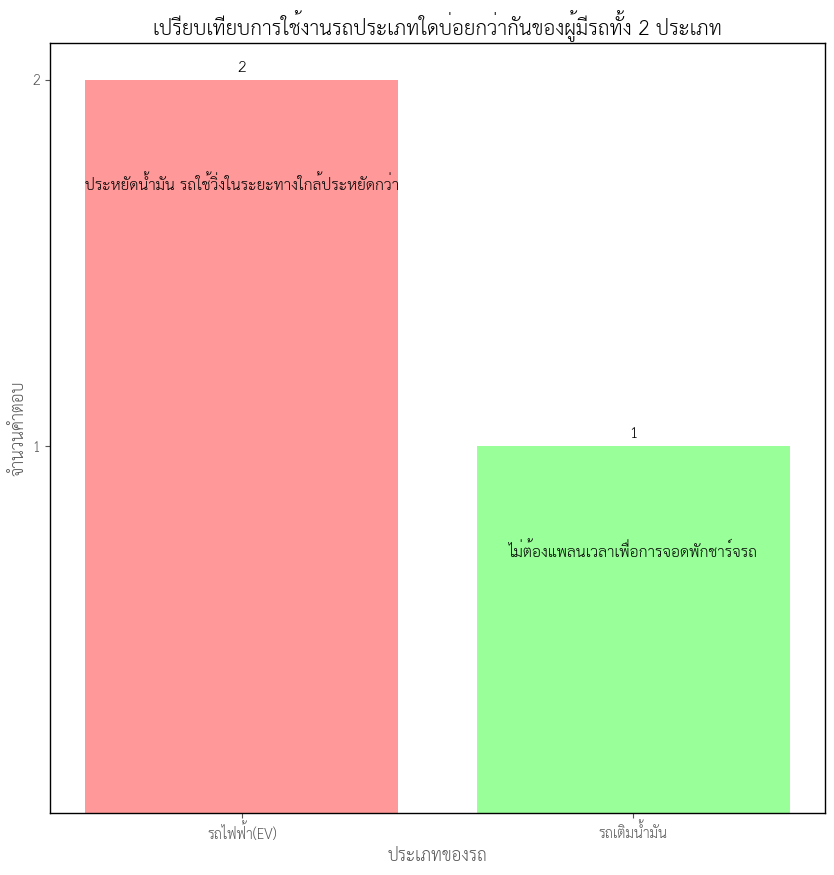

In [ ]:
def autolabel(rects):
    """Attach a text label above each bar in rects, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')

value_counts = data['จากการใช้งานรถทั้ง 2ชนิด คุณใช้รถชนิดไหนบ่อยกว่ากัน'].value_counts()

plt.style.use('ggplot')
# Create a bar plot
fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(value_counts.index, value_counts.values, color=['#ff9999','#99ff99'])

# Annotate the plot with the count values
autolabel(rects1)

# Annotate the plot with the reason for the selection

for i in range(len(value_counts)):
    ax.annotate(reasons[i], xy=(value_counts.index[i], value_counts.values[i]),
                xytext=(value_counts.index[i], value_counts.values[i]-0.3),
                ha='center', fontsize=11)

# Set the plot title and axis labels
ax.set_title('เปรียบเทียบการใช้งานรถประเภทใดบ่อยกว่ากันของผู้มีรถทั้ง 2 ประเภท')
ax.set_xlabel('ประเภทของรถ')
ax.set_ylabel('จำนวนคำตอบ')
ax.set_yticks([1, 2])
ax.set_yticklabels(['1', '2'])
ax.grid(False)
ax.set_facecolor('white')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['top'].set_edgecolor('black')
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['right'].set_edgecolor('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['bottom'].set_edgecolor('black')
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['left'].set_edgecolor('black')

plt.show()


In [ ]:
# Concatenate the three series
combined = pd.concat([data['คุณคิดว่าปั๊มน้ำมันในมหาวิทยาลัยธรรมศาสตร์มีเพียงพอหรือไม่ ?'],
                      data['คุณคิดว่าปั๊มน้ำมันในมหาวิทยาลัยธรรมศาสตร์มีเพียงพอหรือไม่ ?.1'],
                      data['คุณคิดว่าปั๊มน้ำมันในมหาวิทยาลัยธรรมศาสตร์มีเพียงพอหรือไม่ ?.2']])

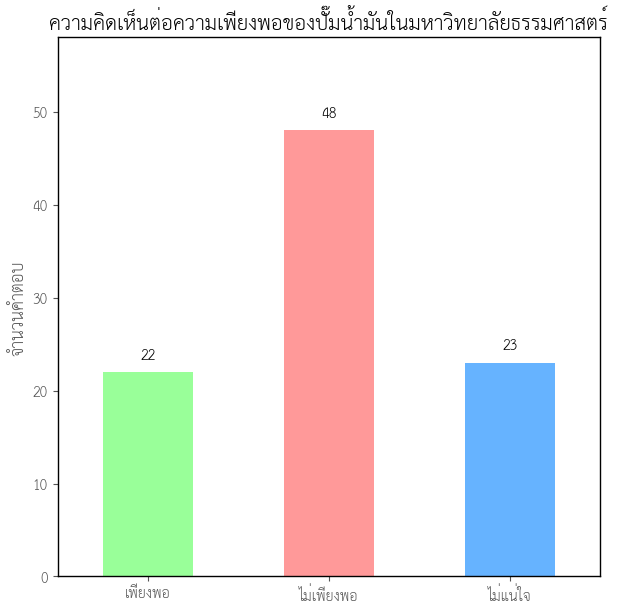

In [ ]:
counts = combined.groupby(combined).size()

# Define custom colors
colors = ['#99ff99','#ff9999','#66B3FF']

# Create a bar plot of the counts
fig, ax = plt.subplots(figsize=(7, 7))
ax = counts.plot(kind='bar', rot=0, color=colors)
#ax.set_xlabel('...')
ax.set_ylabel('จำนวนคำตอบ')
ax.set_title('ความคิดเห็นต่อความเพียงพอของปั๊มนํ้ามันในมหาวิทยาลัยธรรมศาสตร์')

# Add labels to each bar
for i, count in enumerate(counts):
    ax.text(i, count+1, count, ha='center', va='bottom', fontweight='bold')
ax.grid(False)
ax.set_facecolor('white')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['top'].set_edgecolor('black')
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['right'].set_edgecolor('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['bottom'].set_edgecolor('black')
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['left'].set_edgecolor('black')
plt.ylim(0, counts.max() + 10)
plt.show()


In [ ]:
# Combine the two Series into one DataFrame
fuelperdismotor = pd.concat([data['โดยเฉลี่ยแล้วคุณใช้น้ำมันเต็มถัง 1 ถัง ต่อรถมอเตอร์ไซด์คันปัจจุบันของคุณเดินทางเป็นระยะทางกี่กิโลเมตร'],
                data['โดยเฉลี่ยแล้วคุณใช้น้ำมันเต็มถัง 1 ถังในรถคันปัจจุบันของคุณเดินทางเป็นระยะทางกี่กิโลเมตร']])

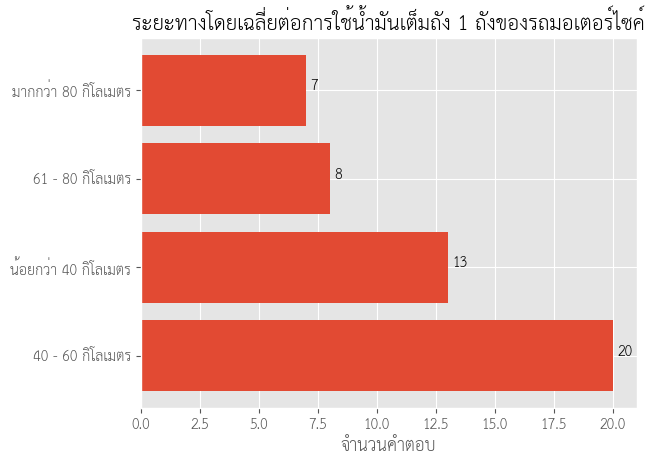

In [ ]:
mpl.rcParams['font.family'] = 'TH Sarabun New'
# Count the values and sort by descending order
counts = fuelperdismotor.value_counts().sort_values(ascending=False)

# Create a horizontal bar chart
plt.barh(counts.index, counts.values)

# Set the x-axis label
plt.xlabel('จำนวนคำตอบ')

# Set the y-axis label
#plt.ylabel('ylabel')

# Set the title
plt.title('ระยะทางโดยเฉลี่ยต่อการใช้นํ้ามันเต็มถัง 1 ถังของรถมอเตอร์ไซค์')

for i, v in enumerate(counts):
    plt.text(v + 0.2, i, str(v))

# Set the font size of the tick labels
plt.xticks(fontsize=10)

# Show the plot
plt.show()

In [ ]:
#ระยะทางโดยเฉลี่รถยนต์
print(data['โดยเฉลี่ยแล้วคุณใช้น้ำมันเต็มถัง 1 ถัง ต่อรถคันปัจจุบันของคุณเดินทางเป็นระยะทางกี่กิโลเมตร'].value_counts())
print(data['โดยเฉลี่ยแล้วคุณใช้น้ำมันเต็มถัง 1 ถัง ต่อรถยนต์คันปัจจุบันของคุณเดินทางเป็นระยะทางกี่กิโลเมตร'].value_counts())

101 - 250 กิโลเมตร       15
251 - 350 กิโลเมตร       11
มากกว่า 450 กิโลเมตร      9
351 - 450 กิโลเมตร        7
น้อยกว่า 100 กิโลเมตร     3
Name: โดยเฉลี่ยแล้วคุณใช้น้ำมันเต็มถัง 1 ถัง ต่อรถคันปัจจุบันของคุณเดินทางเป็นระยะทางกี่กิโลเมตร, dtype: int64
101 - 250 กิโลเมตร       17
251 - 350 กิโลเมตร       12
351 - 450 กิโลเมตร        5
มากกว่า 450 กิโลเมตร      5
น้อยกว่า 100 กิโลเมตร     5
Name: โดยเฉลี่ยแล้วคุณใช้น้ำมันเต็มถัง 1 ถัง ต่อรถยนต์คันปัจจุบันของคุณเดินทางเป็นระยะทางกี่กิโลเมตร, dtype: int64


In [ ]:
# Combine the two Series into one DataFrame
fuelperdiscar = pd.concat([data['โดยเฉลี่ยแล้วคุณใช้น้ำมันเต็มถัง 1 ถัง ต่อรถคันปัจจุบันของคุณเดินทางเป็นระยะทางกี่กิโลเมตร'],
                data['โดยเฉลี่ยแล้วคุณใช้น้ำมันเต็มถัง 1 ถัง ต่อรถยนต์คันปัจจุบันของคุณเดินทางเป็นระยะทางกี่กิโลเมตร']])

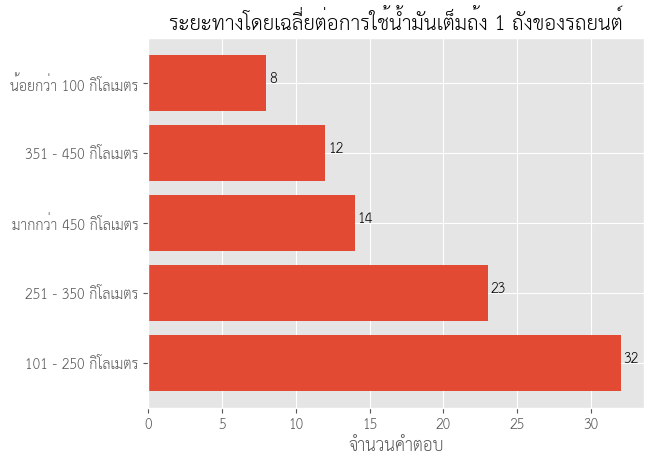

In [ ]:
mpl.rcParams['font.family'] = 'TH Sarabun New'
# Count the values and sort by descending order
counts = fuelperdiscar.value_counts().sort_values(ascending=False)

# Create a horizontal bar chart
plt.barh(counts.index, counts.values)

# Set the x-axis label
plt.xlabel('จำนวนคำตอบ')

# Set the y-axis label
#plt.ylabel('ylabel')

# Set the title
plt.title('ระยะทางโดยเฉลี่ยต่อการใช้นํ้ามันเต็มถ้ง 1 ถังของรถยนต์')

for i, v in enumerate(counts):
    plt.text(v + 0.2, i, str(v))

# Set the font size of the tick labels
plt.xticks(fontsize=10)

# Show the plot
plt.show()

In [ ]:
fuelproblem = data['ปัญหาที่คุณพบจากการใช้รถแบบเติมน้ำมัน'].fillna('') + data['ปัญหาที่พบจากการใช้รถแบบเติมน้ำมัน'].fillna('') + data['ปัญหาที่คุณพบจากการใช้รถแบบเติมน้ำมัน.1'].fillna('')
fuelproblem = fuelproblem.str.replace(' ', '')
fuelproblem

0                              ราคาน้ำมันสูงและรอคิวนาน
1                              ราคาน้ำมันเเพงปล่อยมลพิษ
2     ราคาน้ำมันแพงและไม่ทราบเวลาที่แน่นอนของราคาน้ำ...
3                                         ราคาน้ำมันแพง
4                                            ราคาน้ำมัน
                            ...                        
92                                        น้ำมันแพงขึ้น
93                                            น้ำมันแพง
94                                        ราคาน้ำมันแพง
95                                                    -
96                                            น้ำมันแพง
Length: 97, dtype: object

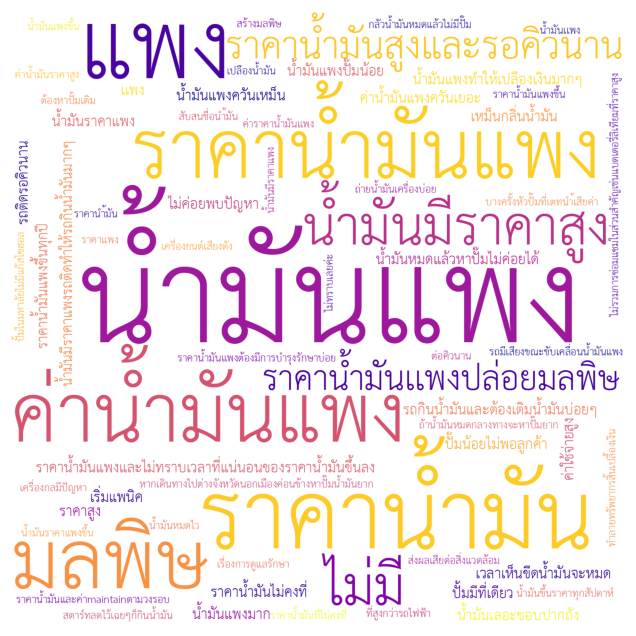

In [ ]:
text = ' '.join(fuelproblem.astype(str))

regexp = r"[ก-๙a-zA-Z']+"
path = '/content/thsarabunnew-webfont.ttf'
# Generate a wordcloud image
#wordcloud = WordCloud(font_path=path,width=800, height=800, background_color='white' ,regexp=regexp,).generate(text)
wordcloud = WordCloud(
                      font_path=path,
                      relative_scaling = 0.3,
                      min_font_size=1,
                      background_color="white",
                      width=500,
                      height=500,
                      max_words=2000,
                      colormap='plasma',
                      scale=3,
                      font_step=3,
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text)

# Display the wordcloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
nc = data['ในการตัดสินใจซื้อรถครั้งต่อไป คุณสนใจเลือกซื้อรถประเภทใด'].fillna('') + data['ในการตัดสินใจซื้อรถครั้งต่อไป คุณสนใจเลือกซื้อรถประเภทใด.1'].fillna('') + data['ในการตัดสินใจซื้อรถครั้งต่อไป คุณสนใจเลือกซื้อรถประเภทใด.2'].fillna('') + data['ในการตัดสินใจซื้อ คุณสนใจเลือกซื้อรถประเภทใด'].fillna('')
nc = nc.str.replace(' ', '')
nc = nc.drop(index=nc[nc == ''].index)
print(nc.value_counts())

รถไฟฟ้า(EV)                           51
รถแบบเติมน้ำมัน                       31
Hybrid                                 4
ยังไม่ชัดเจน                           1
2แบบตามการใช้งาน                       1
ไม่มีความสนใจเรื่องรถและการ.ซื้อรถ     1
รถแบบPHEVหรือแบบPlug-inhybrid          1
PHEV                                   1
ยังไม่แน่ใจ                            1
ได้ทั้งคู่                             1
รถที่ใช้แก๊สNGV                        1
dtype: int64


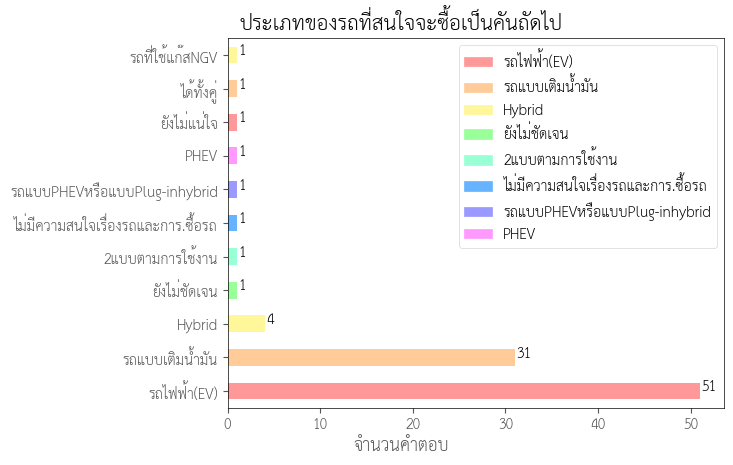

In [ ]:
# Set the background color to white
plt.rcParams['figure.facecolor'] = 'white'

# Turn off the gray grid
plt.grid(False)

# Create a bar chart of the value counts with different colors
colors = ['#ff9999', '#ffcc99', '#fff799', '#99ff99', '#99ffd5', '#66b3ff', '#9999ff', '#fe99ff']

counts = nc.value_counts()
counts.plot(kind='barh', color=colors)

# Set the title and labels
plt.title('ประเภทของรถที่สนใจจะซื้อเป็นคันถัดไป',x=0.35)
plt.xlabel('จำนวนคำตอบ',x=0.35)

# Add data labels
for i, v in enumerate(counts):
    plt.text(v + 0.2, i, str(v))

# Add legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors[:len(counts)]]
labels = counts.index
legend = plt.legend(handles, labels, loc='best', frameon=True)
legend.get_frame().set_facecolor('white')

# Remove gray background
ax = plt.gca()
ax.set_facecolor('white')

# Add a frame
plt.box(on=True)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')

# Show the chart
plt.show()


In [ ]:
#เหตุผลในการตัดสินใจซื้อรถครั้งต่อไปของคุณ
print(data['เหตุผลในการตัดสินใจซื้อรถครั้งต่อไปของคุณ'].value_counts())
print(data['เหตุผลในการตัดสินใจซื้อรถครั้งต่อไปของคุณ.1'].value_counts())
print(data['เหตุผลในการตัดสินใจซื้อรถครั้งต่อไปของคุณ.2'].value_counts())

รถไฟฟ้าดูประหยัดพลังงานมากกว่า และทำให้เกิดมลพิษน้อยกว่ารถน้ำมัน     1
-                                                                    1
งบปรัมาณ                                                             1
ประหยัดน้ำมัน ลดการเกิดมลพิษทางอากาศ                                 1
Name: เหตุผลในการตัดสินใจซื้อรถครั้งต่อไปของคุณ, dtype: int64
พลังงานไฟฟ้าเป็นพลังงานที่ยั่งยืนนำกลับมาใช้ใหม่ได้                                                                                                                1
เทคโนโลยีและ                                                                                                                                                       1
เพราะยังไม่เชื่อใจกับการซื้อรถไฟฟ้า                                                                                                                                1
ประหยัดนำ้มัน                                                                                                                                                  

In [ ]:
reafcar = data['เหตุผลในการตัดสินใจซื้อรถครั้งต่อไปของคุณ'].fillna('') + data['เหตุผลในการตัดสินใจซื้อรถครั้งต่อไปของคุณ.1'].fillna('') + data['เหตุผลในการตัดสินใจซื้อรถครั้งต่อไปของคุณ.2'].fillna('')+data['เหตุผลในการตัดสินใจซื้อรถของคุณ'].fillna('')
reafcar = reafcar.str.replace(' ', '')
reafcar = reafcar.drop(index=reafcar[reafcar == ''].index)
#print(reafcar.value_counts())

# concatenate the two series into a single dataframe
combined_df = pd.concat([nc, reafcar], axis=1)

# rename the columns for clarity
combined_df.columns = ['Preferred Car Type', 'Reason for Buying']

# print the resulting dataframe
print(combined_df)

   Preferred Car Type                                  Reason for Buying
0              Hybrid                                   ต้องใช้รถในเมือง
1         รถไฟฟ้า(EV)  พลังงานไฟฟ้าเป็นพลังงานที่ยั่งยืนนำกลับมาใช้ให...
2         รถไฟฟ้า(EV)                                          ค่าน้ำมัน
3         รถไฟฟ้า(EV)                                   น่าจะประหยัดกว่า
4         รถไฟฟ้า(EV)                                        ความประหยัด
..                ...                                                ...
92             Hybrid            เป็นทางเลือกในการซื้อรถใช้เป็นจองตัวเอง
93    รถแบบเติมน้ำมัน                                         มั่นใจกว่า
94        รถไฟฟ้า(EV)                                    มีความสะดวกสบาย
95        รถไฟฟ้า(EV)                                    เดินทางบ่อยขึ้น
96        รถไฟฟ้า(EV)                                            ประหยัด

[94 rows x 2 columns]


In [ ]:
#EV
rev= combined_df.loc[combined_df['Preferred Car Type'] == 'รถไฟฟ้า(EV)', 'Reason for Buying']
rev = rev.str.replace(' ', '')
#rev

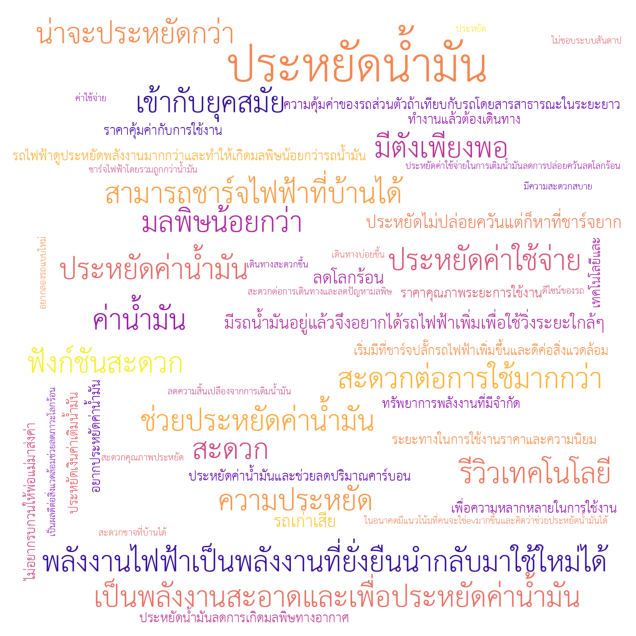

In [ ]:
text = ' '.join(rev.astype(str))

regexp = r"[ก-๙a-zA-Z']+"
path = '/content/thsarabunnew-webfont.ttf'
# Generate a wordcloud image
#wordcloud = WordCloud(font_path=path,width=800, height=800, background_color='white' ,regexp=regexp,).generate(text)
wordcloud = WordCloud(
                      font_path=path,
                      relative_scaling = 0.3,
                      min_font_size=1,
                      background_color="white",
                      width=500,
                      height=500,
                      max_words=2000,
                      colormap='plasma',
                      scale=3,
                      font_step=3,
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text)

# Display the wordcloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#แบบเติมนํ้ามัน
rc= combined_df.loc[combined_df['Preferred Car Type'] == 'รถแบบเติมน้ำมัน', 'Reason for Buying']
rc = rc.str.replace(' ', '')
#rc

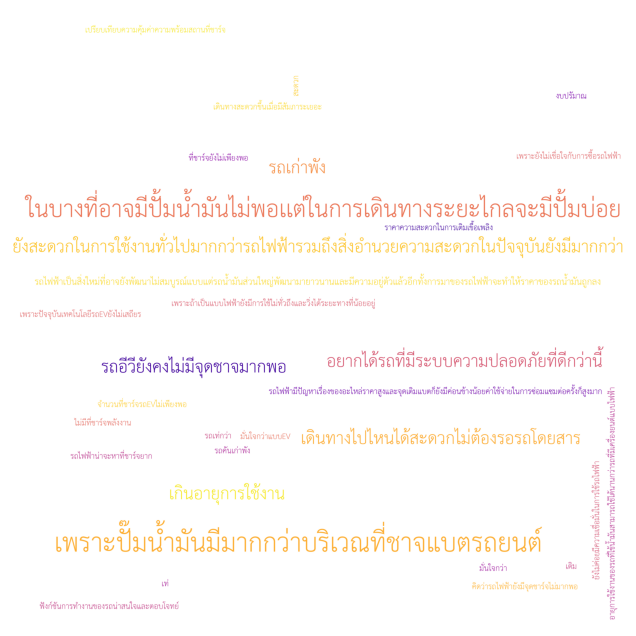

In [ ]:
text = ' '.join(rc.astype(str))

regexp = r"[ก-๙a-zA-Z']+"
path = '/content/thsarabunnew-webfont.ttf'
# Generate a wordcloud image
#wordcloud = WordCloud(font_path=path,width=800, height=800, background_color='white' ,regexp=regexp,).generate(text)
wordcloud = WordCloud(
                      font_path=path,
                      relative_scaling = 0.3,
                      min_font_size=6,
                      background_color="white",
                      width=500,
                      height=500,
                      max_words=2000,
                      colormap='plasma',
                      scale=10,
                      font_step=1,
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text)

# Display the wordcloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#Hybrid & PHEV
rhev = combined_df.loc[(combined_df['Preferred Car Type'] == 'Hybrid') | (combined_df['Preferred Car Type'] == 'PHEV')  | (combined_df['Preferred Car Type'] == 'รถที่ใช้แก๊สNGV ') , 'Reason for Buying']
rhev = rhev.str.replace(' ', '')

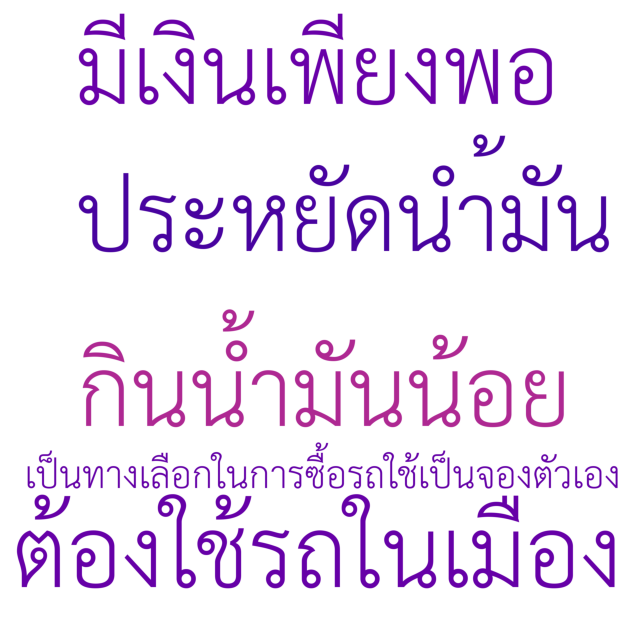

In [ ]:
text = ' '.join(rhev.astype(str))

regexp = r"[ก-๙a-zA-Z']+"
path = '/content/thsarabunnew-webfont.ttf'
# Generate a wordcloud image
#wordcloud = WordCloud(font_path=path,width=800, height=800, background_color='white' ,regexp=regexp,).generate(text)
wordcloud = WordCloud(
                      font_path=path,
                      relative_scaling = 0.3,
                      min_font_size=5,
                      background_color="white",
                      width=500,
                      height=500,
                      max_words=2000,
                      colormap='plasma',
                      scale=5,
                      font_step=1,
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text)

# Display the wordcloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()